In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.Container {width:85% !important;}
div.CodeMirror {font-family:나눔고딕; font-size:13pt; line-height : 150%;}
div.output_area pre {font-family:나눔고딕; font-size:13pt; line-height : 150%;}
div.output_wrapper pre {font-family:나눔고딕; font-size:13pt; line-height : 150%;}
div.input {font-family:나눔고딕; font-size:13pt; line-height : 150%;}
</style>
"""))

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

# 1. 통합데이터로 분석해보기

In [4]:
df = pd.read_csv('D:/Gray_Bigdata/src/00_Projects/data/Total_players_data/total_player_1819.csv',
                 encoding='UTF8').drop(['Unnamed: 0'],axis=1)

df.head(10)

,Player,age,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,...,Off,Disp,UnsTch,Assists.1,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,Aaron Cresswell,31,Defender,West Ham United,1589,888,701,England,20,11,...,0.1,0.3,0.7,1,0.9,40.6,81.4,0.8,1.5,0.0
1,Aaron Lennon,33,Midfielder,Burnley,1217,487,730,England,16,7,...,0.0,0.8,0.9,1,0.4,17.4,78.8,0.2,0.3,0.0
2,Aaron Leya Iseka,23,Forward,Toulouse,1437,626,811,Belgium,28,15,...,0.3,0.9,1.7,0,0.4,9.4,79.4,0.0,0.1,0.0
3,Aaron Mooy,30,Midfielder,Huddersfield Town,2327,1190,1137,Australia,29,15,...,0.0,1.6,1.2,1,1.5,44.1,80.2,1.4,2.1,0.0
4,Aaron Ramsey,30,Midfielder,Arsenal,1327,689,638,Wales,28,14,...,0.1,1.0,1.3,6,0.9,27.6,82.0,0.2,0.9,0.0
5,Aaron Rowe,20,Forward,Huddersfield Town,69,14,55,England,2,1,...,0.0,2.0,0.5,0,0.0,10.0,65.0,0.0,0.0,0.0
6,Aaron Wan-Bissaka,23,Midfielder,Crystal Palace,3135,1605,1530,England,35,18,...,0.1,1.1,1.2,3,0.4,33.3,73.0,0.3,1.0,0.0
7,Aarón Martín,23,Defender,Mainz 05,2879,1502,1377,Spain,33,17,...,0.2,0.7,0.7,3,1.9,36.2,81.9,1.6,1.8,0.0
8,Abdallah Ali Mohamed,22,Forward,Olympique Marseille,0,0,0,France,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,Abdallah N'Dour,27,Defender,Strasbourg,295,80,215,Senegal,4,1,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [211]:
df.columns

Index(['Player', 'age', 'position', 'Current Club', 'minutes_played_overall',
       'minutes_played_home', 'minutes_played_away', 'nationality',
       'appearances_overall', 'appearances_home', 'appearances_away',
       'goals_overall', 'goals_home', 'goals_away', 'assists_overall',
       'assists_home', 'assists_away', 'penalty_goals', 'penalty_misses',
       'clean_sheets_overall', 'clean_sheets_home', 'clean_sheets_away',
       'conceded_overall', 'conceded_home', 'conceded_away',
       'yellow_cards_overall', 'red_cards_overall',
       'goals_involved_per_90_overall', 'assists_per_90_overall',
       'goals_per_90_overall', 'goals_per_90_home', 'goals_per_90_away',
       'min_per_goal_overall', 'conceded_per_90_overall',
       'min_per_conceded_overall', 'min_per_match', 'min_per_card_overall',
       'min_per_assist_overall', 'cards_per_90_overall',
       'rank_in_league_top_attackers', 'rank_in_league_top_midfielders',
       'rank_in_league_top_defenders', 'rank_in_cl

## 효율적인 공격을 했던 선수는 누구였을까?
- 내 생각에는 적은 시간에 많은 골을 넣는 선수라고 생각한다.
*  Mins: 총 경기 시간<br>
    Goals: 총 골 수<br>
    Assists: 총 도움 수<br>
    SpG: 경기당 슈팅 수<br>
    KeyP: 게임당 키패스 수<br>
    Drb: 게임당 드리블 수<br>
    Fouled: 게임당 당한 파울 수<br>
    Off: 경기당 오프사이드 범한 수<br>
    Disp: 게임 당 볼 소유권 잃은 횟수<br>
    UnsTch: 게임당 안좋은 볼 제어 횟수<br>

In [241]:
# 전체 데이터 중, 공격수만 추출하여 따로 데이터 생성
df_forward = df.loc[df['position'] == 'Forward']

In [242]:
df_forward = df_forward.reset_index(drop=True)

df_forward.head()

,Player,age,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,...,Off,Disp,UnsTch,Assists.1,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,Aaron Leya Iseka,23,Forward,Toulouse,1437,626,811,Belgium,28,15,...,0.3,0.9,1.7,0,0.4,9.4,79.4,0.0,0.1,0.0
1,Aaron Rowe,20,Forward,Huddersfield Town,69,14,55,England,2,1,...,0.0,2.0,0.5,0,0.0,10.0,65.0,0.0,0.0,0.0
2,Abdallah Ali Mohamed,22,Forward,Olympique Marseille,0,0,0,France,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Abdul Majeed Waris,29,Forward,Nantes,2255,1146,1109,Ghana,33,17,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Abel Ruiz Ortega,21,Forward,FC Barcelona,21,21,0,Spain,1,1,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
df_forward = df_forward.loc[ : , ['Player', 'Current Club', 'minutes_played_overall', 'appearances_overall', 'Goals', 'SpG', 'Drb']]

df_forward.head()

,Player,Current Club,minutes_played_overall,appearances_overall,Goals,SpG,Drb
0,Aaron Leya Iseka,Toulouse,1437,28,4,1.0,0.1
1,Aaron Rowe,Huddersfield Town,69,2,0,0.0,0.0
2,Abdallah Ali Mohamed,Olympique Marseille,0,0,0,0.0,0.0
3,Abdul Majeed Waris,Nantes,2255,33,0,0.0,0.0
4,Abel Ruiz Ortega,FC Barcelona,21,1,0,0.0,0.0


In [244]:
df_forward.rename(columns={'minutes_played_overall' : 'minutes',
                           'appearances_overall' : 'apps', 'Current Club' : 'Club'}, inplace=True)

In [248]:
df_forward.sort_values(by='SpG', ascending=False, inplace=True)

df_forward.head(20)

,Player,Club,minutes,apps,Goals,SpG,Drb
128,Cristiano Ronaldo,Juventus,2689,31,21,5.7,0.3
365,Lionel Messi,FC Barcelona,2709,34,36,5.0,0.5
528,Robert Lewandowski,Bayern München,2959,33,22,4.4,0.2
350,Kylian Mbappé,PSG,2340,29,33,4.3,0.2
366,Lorenzo Insigne,Napoli,2080,28,10,4.3,0.4
192,Fabio Quagliarella,Sampdoria,3211,37,26,3.8,0.4
258,Harry Kane,Tottenham Hotspur,2427,28,17,3.6,0.5
452,Mohamed Salah,Liverpool,3262,38,22,3.6,0.3
161,Domenico Berardi,Sassuolo,2878,35,8,3.6,1.7
612,Timo Werner,RB Leipzig,2524,30,16,3.6,0.4


In [23]:
# 경기 당 슈팅 수 (SpG)와 경기당 골수(Goals / apps)로 산점도 그려보기
GoalspG = round(df_forward['Goals'] / df_forward['apps'], 2)

In [25]:
GoalspG = GoalspG.to_list()

In [26]:
df_forward['GoalspG'] = GoalspG

In [41]:
df_forward.head(20)

,Player,Club,minutes,apps,Goals,SpG,GoalspG
1667,Lionel Messi,FC Barcelona,2709,34,36,5.0,1.06
1608,Kylian Mbappé,PSG,2340,29,33,4.3,1.14
846,Fabio Quagliarella,Sampdoria,3211,37,26,3.8,0.70
741,Duván Zapata,Atalanta,2898,37,23,3.2,0.62
2363,Pierre-Emerick Aubameyang,Arsenal,2731,36,22,2.6,0.61
2096,Mohamed Salah,Liverpool,3262,38,22,3.6,0.58
2568,Sadio Mané,Liverpool,3086,36,22,2.4,0.61
2191,Nicolas Pépé,Lille,3332,38,22,3.1,0.58
2466,Robert Lewandowski,Bayern München,2959,33,22,4.4,0.67
1751,Luis Suárez,FC Barcelona,2829,33,21,3.4,0.64


In [59]:
df_forward['Player'][:1]

1667    Lionel Messi
Name: Player, dtype: object

In [77]:
df_forward = df_forward.reset_index(drop=True)

df_forward

,Player,Club,minutes,apps,Goals,SpG,GoalspG
0,Lionel Messi,FC Barcelona,2709,34,36,5.0,1.06
1,Kylian Mbappé,PSG,2340,29,33,4.3,1.14
2,Fabio Quagliarella,Sampdoria,3211,37,26,3.8,0.70
3,Duván Zapata,Atalanta,2898,37,23,3.2,0.62
4,Pierre-Emerick Aubameyang,Arsenal,2731,36,22,2.6,0.61
5,Mohamed Salah,Liverpool,3262,38,22,3.6,0.58
6,Sadio Mané,Liverpool,3086,36,22,2.4,0.61
7,Nicolas Pépé,Lille,3332,38,22,3.1,0.58
8,Robert Lewandowski,Bayern München,2959,33,22,4.4,0.67
9,Luis Suárez,FC Barcelona,2829,33,21,3.4,0.64


In [193]:
df_forward.sort_values(by='SpG', ascending=False).head(10)

,Player,Club,minutes,apps,Goals,SpG,GoalspG
11,Cristiano Ronaldo,Juventus,2689,31,21,5.7,0.68
0,Lionel Messi,FC Barcelona,2709,34,36,5.0,1.06
8,Robert Lewandowski,Bayern München,2959,33,22,4.4,0.67
1,Kylian Mbappé,PSG,2340,29,33,4.3,1.14
2,Fabio Quagliarella,Sampdoria,3211,37,26,3.8,0.70
25,Timo Werner,RB Leipzig,2524,30,16,3.6,0.53
22,Harry Kane,Tottenham Hotspur,2427,28,17,3.6,0.61
5,Mohamed Salah,Liverpool,3262,38,22,3.6,0.58
9,Luis Suárez,FC Barcelona,2829,33,21,3.4,0.64
19,Arkadiusz Milik,Napoli,2398,35,17,3.2,0.49


In [194]:
df_forward.sort_values(by='GoalspG', ascending=False).head(10)

,Player,Club,minutes,apps,Goals,SpG,GoalspG
1,Kylian Mbappé,PSG,2340,29,33,4.3,1.14
0,Lionel Messi,FC Barcelona,2709,34,36,5.0,1.06
29,Neymar,PSG,1443,17,15,3.2,0.88
14,Edinson Cavani,PSG,1676,21,18,2.5,0.86
12,Iago Aspas,Celta de Vigo,2262,27,20,2.6,0.74
2,Fabio Quagliarella,Sampdoria,3211,37,26,3.8,0.70
15,Paco Alcácer,Borussia Dortmund,1204,26,18,2.0,0.69
11,Cristiano Ronaldo,Juventus,2689,31,21,5.7,0.68
8,Robert Lewandowski,Bayern München,2959,33,22,4.4,0.67
9,Luis Suárez,FC Barcelona,2829,33,21,3.4,0.64


In [ ]:
# 분석 2. 공격수의 전체 골 수 중 패널티 킥 골

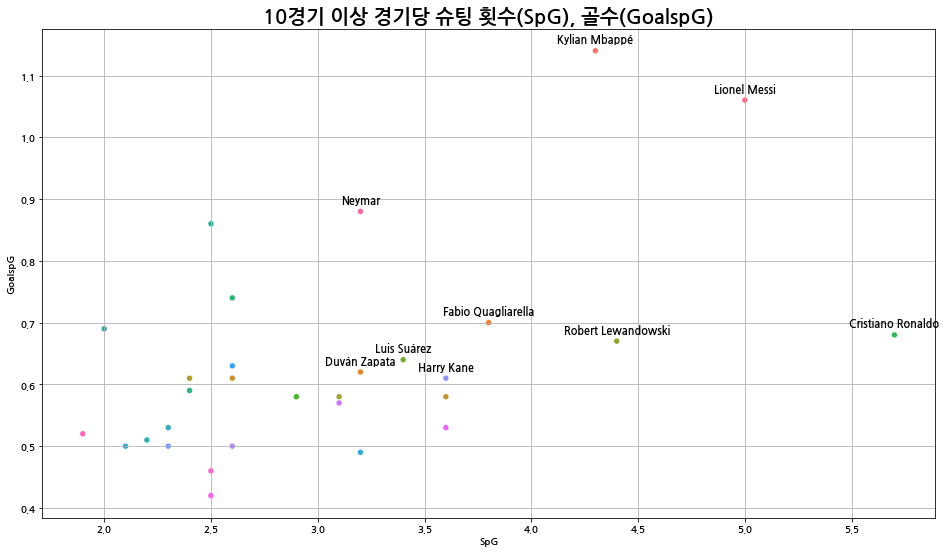

In [209]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data = df_forward, x = 'SpG', y = 'GoalspG', hue = 'Player', legend = False)
plt.title('10경기 이상 경기당 슈팅 횟수(SpG), 골수(GoalspG)', fontsize = 20)
plt.rcParams['font.family'] = 'NanumGothic'
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

for n in range(0, len(df_forward)): 
    if (df_forward['SpG'][n] > 3.0) & (df_forward['GoalspG'][n] > 0.6):
        plt.text(df_forward['SpG'][n], df_forward['GoalspG'][n]+0.01,
             df_forward['Player'][n], fontsize=11, verticalalignment='bottom' , horizontalalignment='center')
    
plt.grid()
plt.show()

## 번뜩이는 기회를 만든 미드필더는 누굴까?
*  Mins:  총 출장시간 <br>
    Assists: 전체 도움 <br>
    KeyP: 게임당 키패스 수 <br>
    AvgP: 게임당 패스 횟수 <br>
    PS%: 패스 성공률 <br>
    Crosses: 게임 당 크로스 횟수 <br>
    LongB: 게임 당 롱볼 횟수 <br>
    ThrB: 상대팀 선수에게 공을 넘겨준 횟수

In [ ]:
# 경기당 키패스 대비 도움수
# 경기당 패스 횟수 대비 성공률

In [180]:
df_midfielder = df.loc[df['position'] == 'Midfielder']

df_midfielder.head(10)

,Player,age,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,...,Off,Disp,UnsTch,Assists.1,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
1,Aaron Lennon,33,Midfielder,Burnley,1217,487,730,England,16,7,...,0.0,0.8,0.9,1,0.4,17.4,78.8,0.2,0.3,0.0
3,Aaron Mooy,30,Midfielder,Huddersfield Town,2327,1190,1137,Australia,29,15,...,0.0,1.6,1.2,1,1.5,44.1,80.2,1.4,2.1,0.0
4,Aaron Ramsey,30,Midfielder,Arsenal,1327,689,638,Wales,28,14,...,0.1,1.0,1.3,6,0.9,27.6,82.0,0.2,0.9,0.0
6,Aaron Wan-Bissaka,23,Midfielder,Crystal Palace,3135,1605,1530,England,35,18,...,0.1,1.1,1.2,3,0.4,33.3,73.0,0.3,1.0,0.0
10,Abdel Malik Hsissane,30,Midfielder,Nîmes,0,0,0,Morocco,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
11,Abdelhamid Sabiri,24,Midfielder,Huddersfield Town,49,0,49,Morocco,2,0,...,0.0,0.0,0.5,0,0.0,4.0,87.5,0.0,0.0,0.0
13,Abdou Lahad Diakhaté,22,Midfielder,Parma,0,0,0,Senegal,1,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
16,Abdoulaye Dabo,20,Midfielder,Nantes,118,118,0,France,2,2,...,0.0,1.0,1.5,0,1.5,15.0,86.7,0.0,0.5,0.0
18,Abdoulaye Doucouré,28,Midfielder,Watford,3062,1566,1496,France,35,18,...,0.1,1.2,1.7,6,1.1,55.4,83.5,0.1,1.7,0.1
19,Abdoulaye Jules Keita,22,Midfielder,Dijon,442,245,197,Guinea,17,9,...,0.2,0.6,1.2,1,0.5,7.4,79.2,0.0,0.4,0.0
